# Logistic Regression MLP and SGD for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the logistic regression, multilayer perceptron and stochastic gradient descent  algorithms. The XLB file is where we modularized the training and validation process

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import svm
from XLB import *

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column this is done by the extract_data function from the XLB file which takes the filename of the dataset as a parameter

---

After the initial preprocessing step, we sperated the music features and the labelled emotion into the x_train and y_train arrays respectively. We also used the scikit learn min max scaler to normalize the dataset.

In [2]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# 33.33% 0.24
feat_sel_2 = SelectFromModel(\
                estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# feat_sel_2 = SelectKBest(mutual_info_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 69) (750,)
(750, 69) (750,)


In [3]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]
ovr_train = []
ovr_val = []
ovr_y_smote = []
ovr_y_os = []
for i in range(1,7):
    ovr_train.append(ovr_labels(y_train, i))
    ovr_val.append(ovr_labels(y_val,i))
    ovr_y_os.append(ovr_labels(y_os,i))
    ovr_y_smote.append(ovr_labels(y_smote,i))

Here we perform different methods to deal with imbalanced datasets. We used the oversampling and SMOTE methodology 

The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the logistic regression object and the hyperparameter search object.

In [4]:
# LogisticRegression, RandomizedSearch
random_search_iterations = 300
k_folds = 10
rand_seed = 3249807

parameters = {
    'penalty':['l1','l2', 'elasticnet', 'none'], 
    'dual' : [True, False],
    'C': uniform(loc=0,scale=4),
    'fit_intercept' : [True,False],
    'class_weight' : ['balanced', None],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'liblinear', 'saga'],
    'max_iter' : [100,200],
    'l1_ratio' : uniform(loc=0,scale=1),
    'warm_start': [True, False]
}
mnb = LogisticRegression(random_state=rand_seed)
random_search_logreg = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                          n_iter=random_search_iterations,\
                                          random_state=rand_seed,n_jobs=-1)

The following cells are where the logistice regression model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.7006
Vanilla Train Accuracy: 71.5711%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.8629
Vanilla Train Accuracy: 86.2843%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79

Best Score: 0.8604
Vanilla Train Accuracy: 86.0349%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.7555
Vanilla Train Accuracy: 80.0499%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.9327
Vanilla Train Accuracy: 93.2668%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79



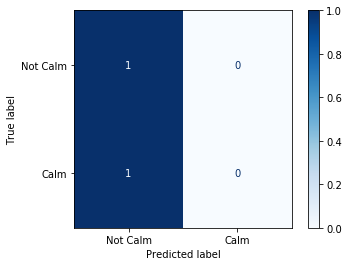

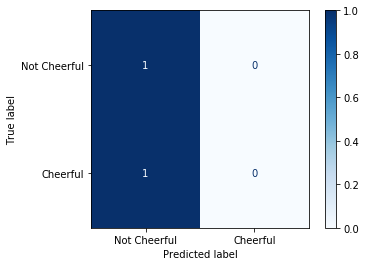

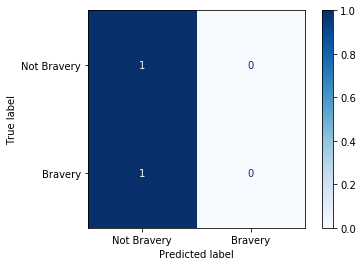

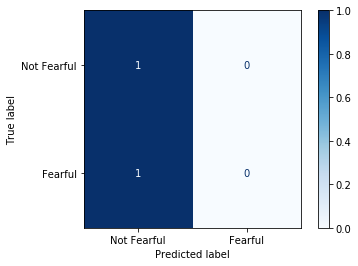

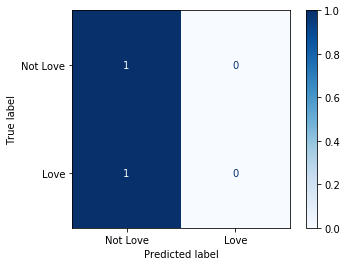

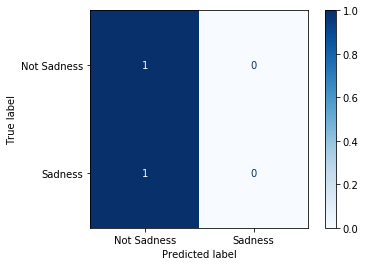

In [5]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_logreg, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_logreg, themes[i])

Best Score: 0.8413
Random Oversampling Train Accuracy: 84.2667%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72

Best Score: 0.8400
Random Oversampling Train Accuracy: 86.0000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.79

Best Score: 0.8493
Random Oversampling Train Accuracy: 85.4667%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.70

Best Score: 0.8333
Random Oversampling Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72

Best Score: 0.9693
Random Oversampling Train Accuracy: 1

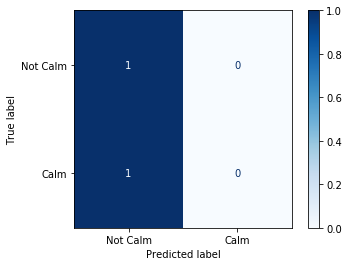

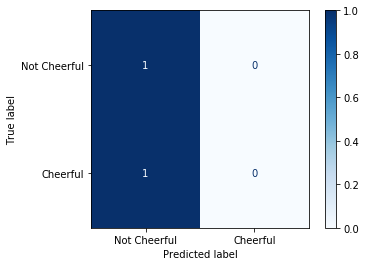

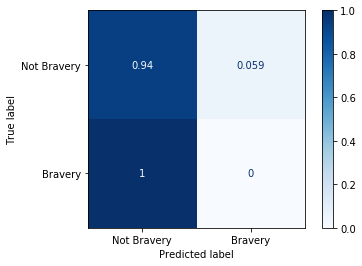

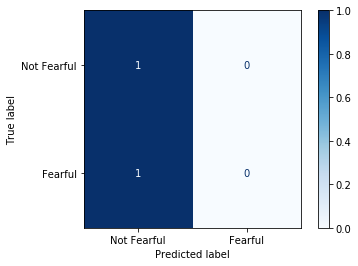

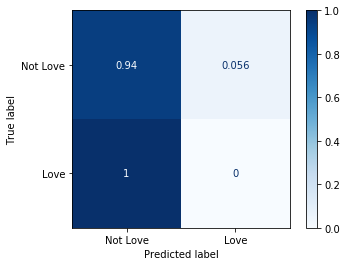

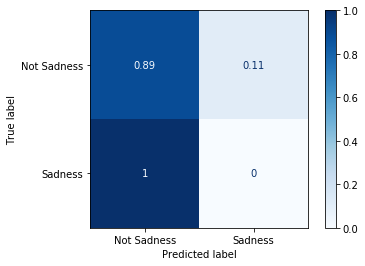

In [6]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_logreg,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_logreg,themes[i])

Best Score: 0.8373
C => 2.4053654638607846
class_weight => None
dual => True
fit_intercept => False
l1_ratio => 0.10619144049180929
max_iter => 200
penalty => l2
solver => liblinear
warm_start => True
Splits: 10
SMOTE Train Accuracy: 84.2667%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 80.95%
SMOTE F1-score: 0.72

Best Score: 0.8333
C => 0.005999861067480516
class_weight => balanced
dual => False
fit_intercept => False
l1_ratio => 0.143618993486056
max_iter => 200
penalty => l1
solver => saga
warm_start => False
Splits: 10
SMOTE Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 85.71%
SMOTE F1-score: 0.79

Best Score: 0.8587
C => 3.2068391597493444
class_weight => None
dual => False
fit_intercept => False
l1_ratio => 0.41667705881571016
max_iter => 100
penalty => none
solver => newton-cg
warm_start => False
Splits: 10
SMOTE Tra

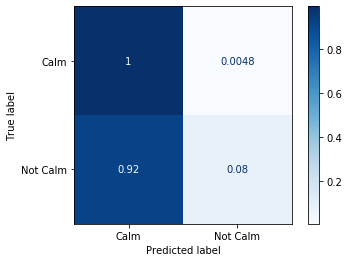

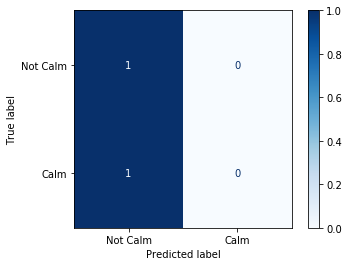

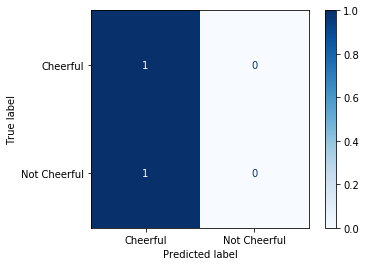

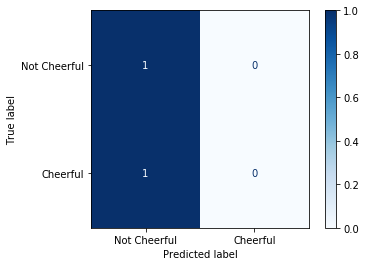

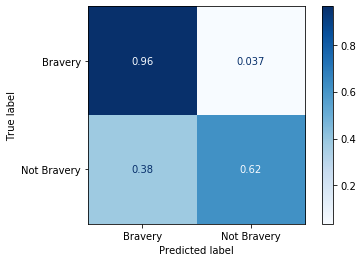

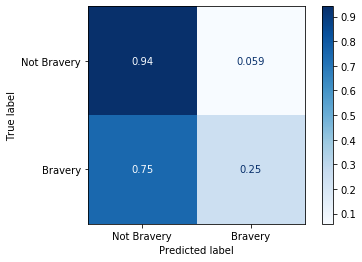

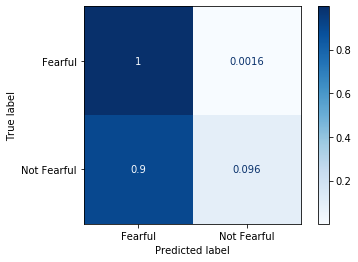

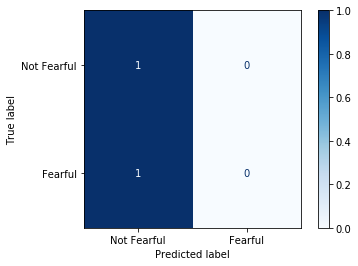

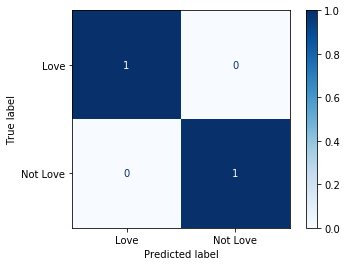

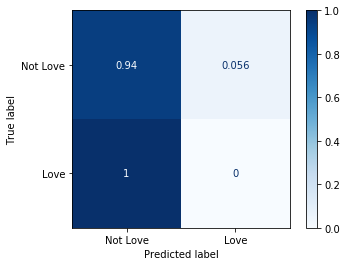

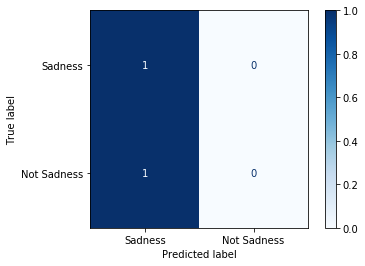

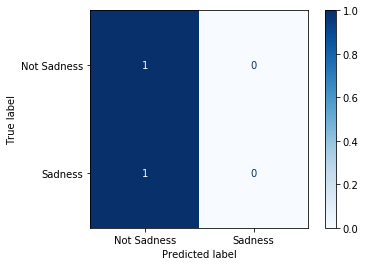

In [7]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_logreg,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_logreg,themes[i])

This cell instantiates the multilayer perceptron object and the hyperparameter search object.

In [4]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# f_classif 47.62% 0.43
feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


In [5]:
# MLPClassifier, RandomizedSearch
random_search_iterations = 50
k_folds = 10
rand_seed = 3249807

parameters = {
    'activation':['logistic', 'tanh', 'relu'], 
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha': [3e-4],
    'batch_size' : [min(200,int(np.power(2,i))) for i in range(4,8)],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'max_iter' : [700],
    'shuffle' : [True,False],
    'momentum' : uniform(loc=0.2,scale=0.8),
    'nesterovs_momentum' : [True,False],
    'early_stopping' : [True,False]
}
mlp = MLPClassifier(random_state=rand_seed)
random_search_mlp = RandomizedSearchCV(mlp, parameters,cv=k_folds,\
                                       n_iter=random_search_iterations,\
                                       random_state=rand_seed, n_jobs=-1)

The following cells are where the multilayer perceptron model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set.

Best Score: 0.6983
Vanilla Train Accuracy: 69.5761%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.8629
Vanilla Train Accuracy: 86.2843%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79

Best Score: 0.8604
Vanilla Train Accuracy: 86.0349%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.7557
Vanilla Train Accuracy: 83.5411%
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.82

Best Score: 0.9376
Vanilla Train Accuracy: 97.5062%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79



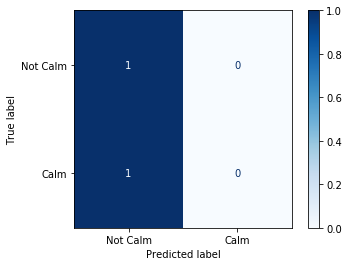

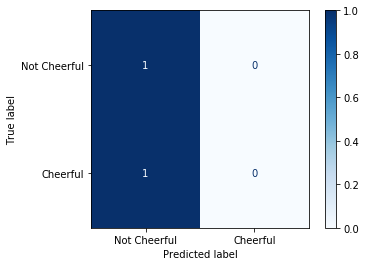

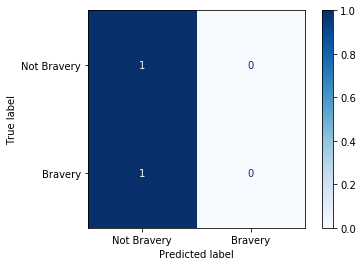

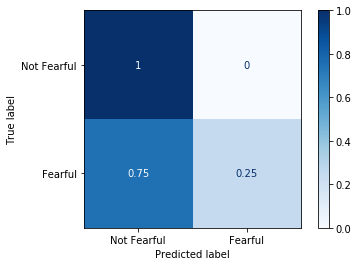

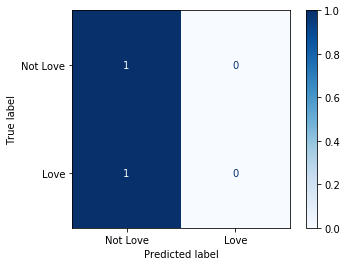

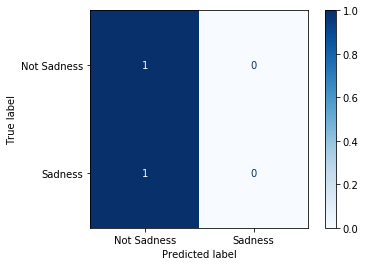

In [6]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_mlp, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_mlp, themes[i])

Best Score: 0.8453
Random Oversampling Train Accuracy: 100.0000%
[0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 57.14%
Random Oversampling F1-score: 0.59

Best Score: 0.9373
Random Oversampling Train Accuracy: 100.0000%
[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.84

Best Score: 0.9493
Random Oversampling Train Accuracy: 100.0000%
[1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.75

Best Score: 0.8867
Random Oversampling Train Accuracy: 99.8667%
[0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.75

Best Score: 0.9893
Random Oversampling Train Accuracy

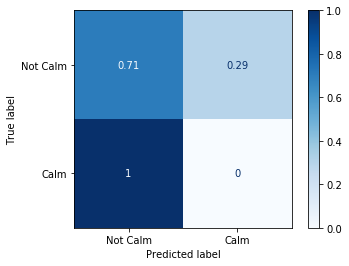

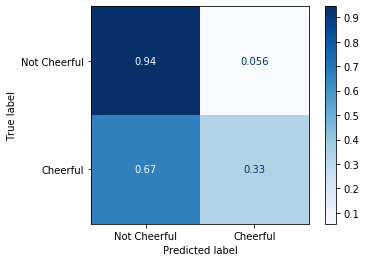

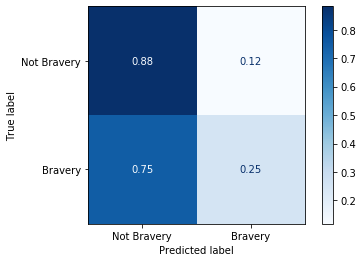

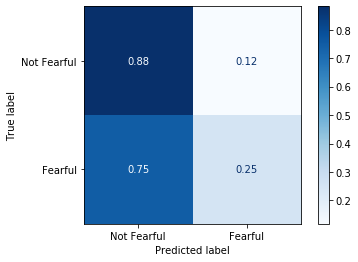

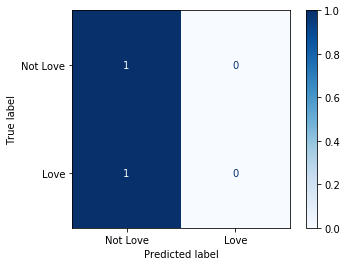

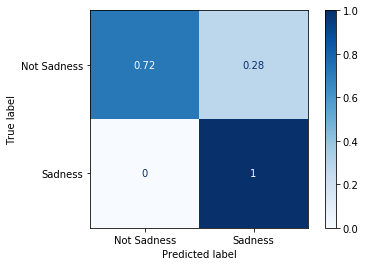

In [7]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_mlp,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_mlp,themes[i])

Best Score: 0.8453
activation => relu
alpha => 0.0003
batch_size => 128
early_stopping => False
learning_rate => invscaling
max_iter => 700
momentum => 0.4643677585442129
nesterovs_momentum => False
shuffle => False
solver => adam
Splits: 10
SMOTE Train Accuracy: 89.6000%
[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 71.43%
SMOTE F1-score: 0.71

Best Score: 0.9173
activation => logistic
alpha => 0.0003
batch_size => 32
early_stopping => True
learning_rate => invscaling
max_iter => 700
momentum => 0.24751577108983086
nesterovs_momentum => False
shuffle => False
solver => lbfgs
Splits: 10
SMOTE Train Accuracy: 100.0000%
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 76.19%
SMOTE F1-score: 0.74

Best Score: 0.9293
activation => tanh
alpha => 0.0003
batch_size => 128
early_stopping => False
learning_rate => adaptive
max_iter => 700
momentum => 0.355461096

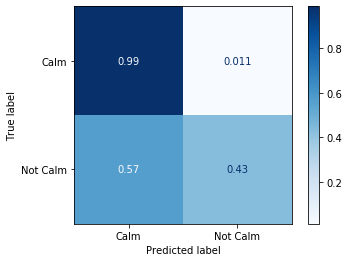

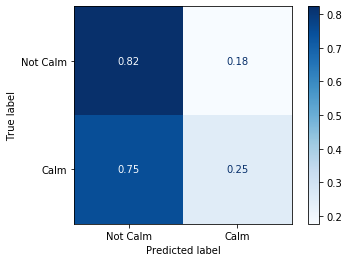

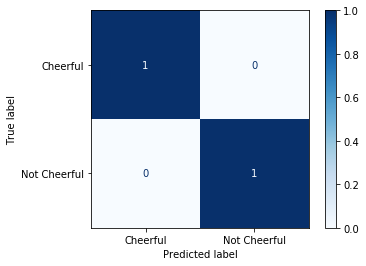

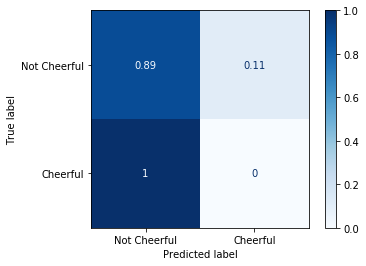

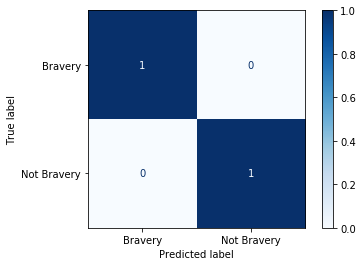

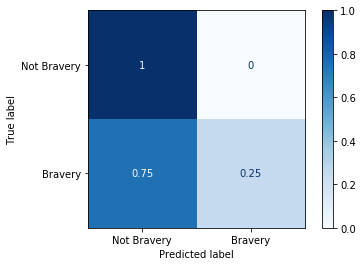

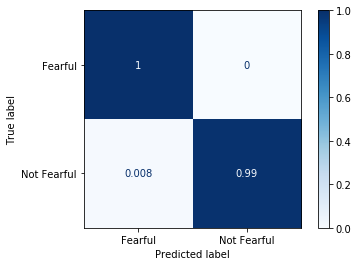

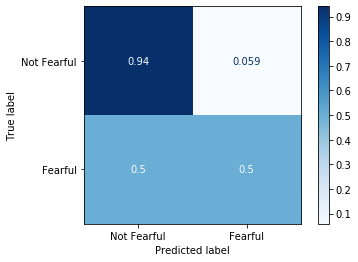

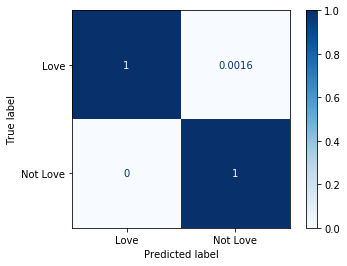

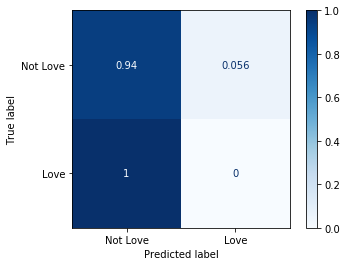

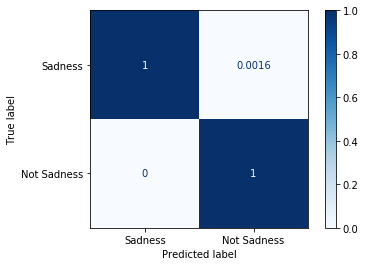

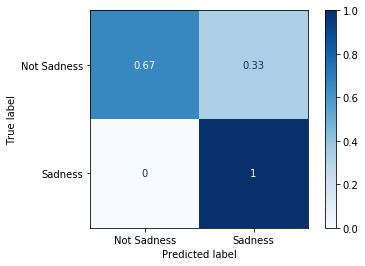

In [8]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_mlp,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_mlp,themes[i])

This cell instantiates the Stochastic Gradient Descent object and the hyperparameter search object.

In [9]:
# extract data from files
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# 28.57% 0.28
feat_sel_2 = SelectFromModel(\
                estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
                                    random_state=481516234))
feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 45) (750,)
(750, 45) (750,)


In [10]:
# SGDClassifier, RandomizedSearch
random_search_iterations = 200
k_folds = 10
rand_seed = 3249807

parameters = {
    'loss' : [ 'hinge', 'log', 'modified_huber', 'squared_hinge', \
              'perceptron', 'squared_loss', 'huber', \
              'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty' : ['l2', 'l1', 'elasticnet'],
    'alpha': [3e-4],
    'l1_ratio': uniform(loc=0,scale=1),
    'fit_intercept' : [True, False],
    'max_iter' : [1000],
    'shuffle' : [True, False],
    'eta0' : uniform(loc=0.01,scale=0.99),
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'early_stopping' : [True, False],
    'warm_start' : [True, False],
    'average' : [True,False]
}
sgdc = SGDClassifier(random_state=rand_seed)
random_search_sgdc = RandomizedSearchCV(sgdc, parameters,cv=k_folds,\
                                        n_iter=random_search_iterations,\
                                        random_state=rand_seed, n_jobs=-1)

The following cells are where the stochastic gradient descent model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set.

Best Score: 0.7056
Vanilla Train Accuracy: 71.3217%
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 76.19%
Vanilla F1-score: 0.75

Best Score: 0.8654
Vanilla Train Accuracy: 86.2843%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79

Best Score: 0.8654
Vanilla Train Accuracy: 86.7830%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.95%
Vanilla F1-score: 0.72

Best Score: 0.7656
Vanilla Train Accuracy: 76.5586%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 76.19%
Vanilla F1-score: 0.70

Best Score: 0.9327
Vanilla Train Accuracy: 93.2668%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
Vanilla Validation Accuracy: 85.71%
Vanilla F1-score: 0.79



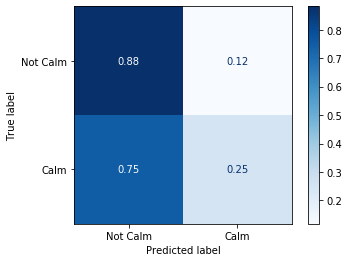

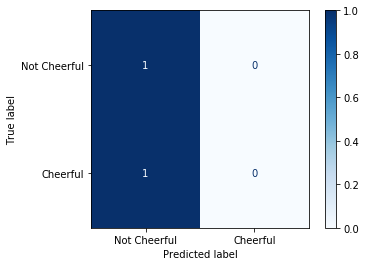

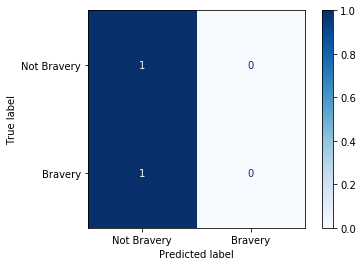

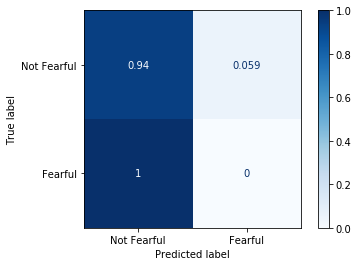

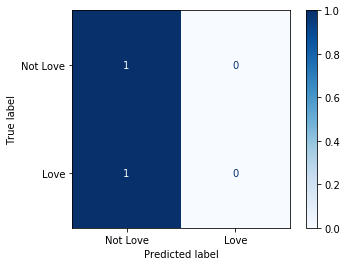

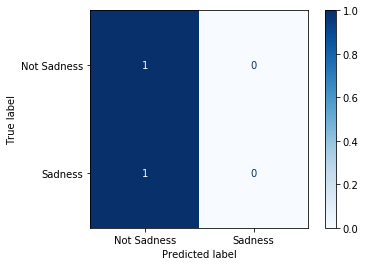

In [11]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_sgdc, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_sgdc, themes[i])

Best Score: 0.8400
Random Oversampling Train Accuracy: 85.2000%
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.70

Best Score: 0.8360
Random Oversampling Train Accuracy: 83.3333%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 85.71%
Random Oversampling F1-score: 0.79

Best Score: 0.8507
Random Oversampling Train Accuracy: 85.2000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 80.95%
Random Oversampling F1-score: 0.72

Best Score: 0.8413
Random Oversampling Train Accuracy: 85.0667%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 76.19%
Random Oversampling F1-score: 0.70

Best Score: 0.8667
Random Oversampling Train Accuracy: 8

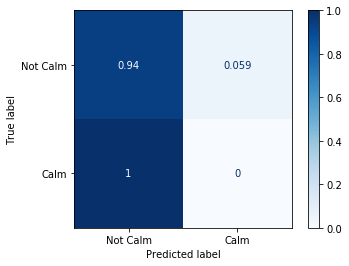

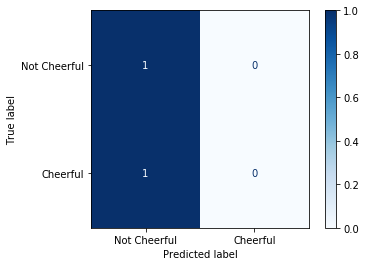

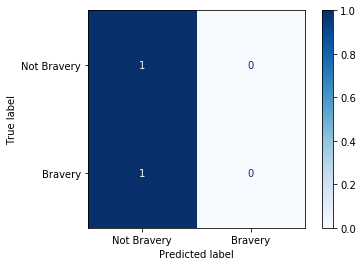

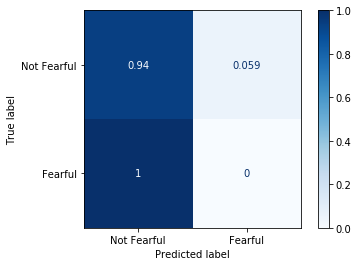

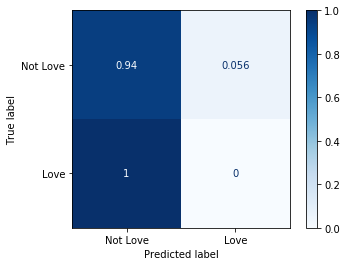

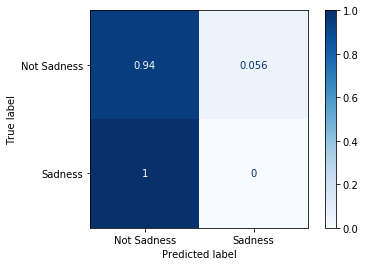

In [12]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_sgdc,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_sgdc,themes[i])

Best Score: 0.8400
alpha => 0.0003
average => False
early_stopping => True
eta0 => 0.9396209857998373
fit_intercept => True
l1_ratio => 0.5650645312898815
learning_rate => invscaling
loss => perceptron
max_iter => 1000
penalty => l1
shuffle => False
warm_start => True
Splits: 10
SMOTE Train Accuracy: 83.8667%
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 71.43%
SMOTE F1-score: 0.67

Best Score: 0.8387
alpha => 0.0003
average => False
early_stopping => True
eta0 => 0.6907819467442107
fit_intercept => True
l1_ratio => 0.585033979170497
learning_rate => adaptive
loss => hinge
max_iter => 1000
penalty => l1
shuffle => True
warm_start => False
Splits: 10
SMOTE Train Accuracy: 84.0000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
SMOTE Validation Accuracy: 85.71%
SMOTE F1-score: 0.79

Best Score: 0.8467
alpha => 0.0003
average => False
early_stopping => False
eta0 => 0.603884817840

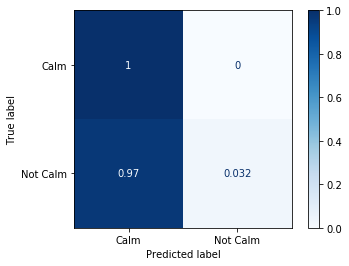

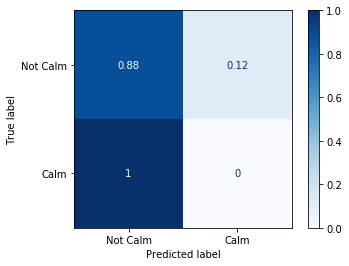

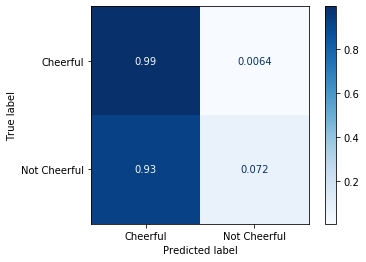

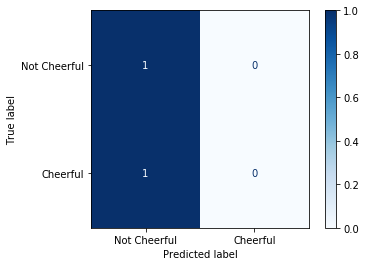

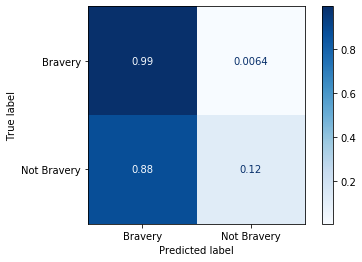

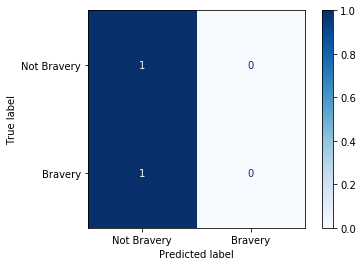

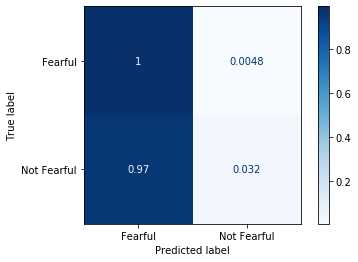

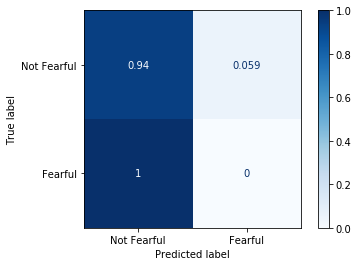

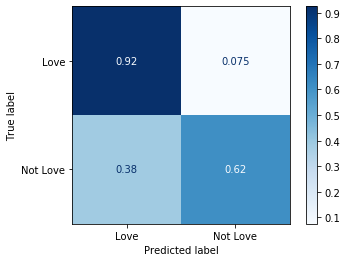

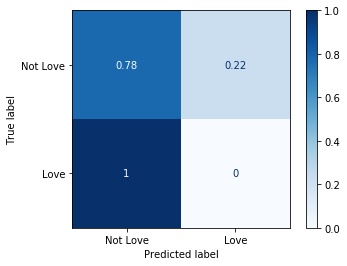

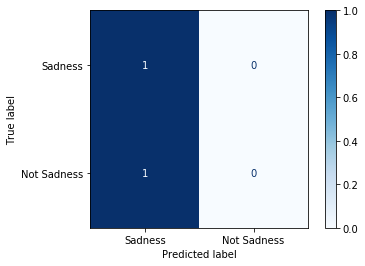

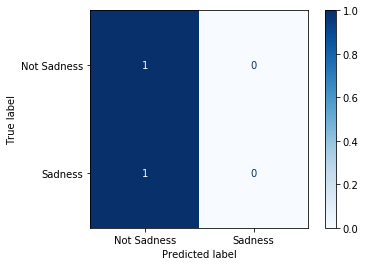

In [13]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_sgdc,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_sgdc,themes[i])